In [21]:
#lab 4
#J.Czaja, nr indeksu 5954
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import datasets
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor  # we will need vif for checking multicollinearity

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # for data splitting and parameter tuning

from sklearn.linear_model import LinearRegression,Ridge,Lasso  # linear regression models

from sklearn.tree import DecisionTreeRegressor  # enables us to perform regression using a decision tree

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor  # ensemble methods for regression
from sklearn.metrics import r2_score,mean_squared_error   # for scoring the model and calculating the mean squared error

from sklearn import preprocessing  # for data preprocessing and scaling

import warnings

warnings.filterwarnings('ignore')
# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Podzielmy zbiór na cechy oraz etykiety - to już znamy
# Dla uproszczenia wybieramy tylko cechę trzecią i czwartą, tj długość i szerokość płatków
X = iris.data[:, [2, 3]]
y = iris.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator z trzema klastrami (klasami)
# Jak dotąd jest podobnie do Laboratorium 2
kmn = KMeans(n_clusters=3)
kmn2 = PCA(n_components=3)

# Uczymy klasyfikator na danych treningowych
# Pierwsza różnica - uczenie przebiega bez nadzoru
# To znaczy nie pokazujemy klasyfikatorowi prawidłowych klas - gatunków kwiatów
# Zgodnie z konfiguracją wcześniej - powiedzieliśmy tylko że chcemy w zbiorze znaleźć 3 klasy
# Dokładny opis algorytmu: https://scikit-learn.org/stable/modules/clustering.html#k-means
kmn.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[2 2 2 0 2 1 2 2 0 1 0 2 0 0 2 1 0 2 0 1 2 2 1 2 2 0 1 0 1 0 2 2 0 1 1 2 2
 1 1 0 2 1 2 2 2 1 1 2 2 2 2 2 1 1 1 0 0 0 1 0 0 1 1 1 0 1 2 2 1 2 0 0 2 0
 0 2 0 1 0 1 0 1 2 1 0 1 1 0 2 1 0 0 0 0 0 0 0 2 2 1 1 0 1 2 0]


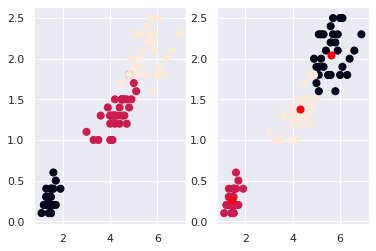

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

print(y_train)
# Wyciągamy punkty centralne klastrów - pokażemy je na wykresie obok punktów ze zbioru uczącego
centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
# pierwszy wykres to nasz zbiór uczący, z prawdziwymi klasami
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50)

# Teraz używamy danych treningowych żeby sprawdzić co klasyfikator o nich myśli
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=50)

# Dokładamy na drugim wykresie centra klastrów
ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

# Różnice kolorów pomiędzy wykresami są nieistotne

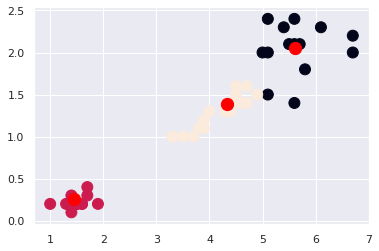

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Próbujemy przewidzieć gatunki dla zbioru testowego
y_pred = kmn.predict(X_test)

# Nowe gatunki przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=120)

# Tak jak powyżej, wyświetlamy centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='red', s=150)
plt.show()

In [0]:
# Zadanie 1
# Poniżej przy pomocy funkcji fetch_openml można zaimportować zbiór danych o samochodach
# Zapoznaj się ze zbiorem danych (zwizualizuj wybrane przez siebie cechy) a następnie podziel go na zbiór uczący i testowy
# Wytrenuj klasyfikator KMeans z zadaną przez siebie liczbą klas i zwizualizuj wyniki predykcji na zbiorze testowym

# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze


from sklearn.datasets import fetch_openml

samochody = fetch_openml('cars1')


In [23]:
samochody.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [24]:
print(samochody.DESCR)
samo = pd.DataFrame(samochody['data'], columns=samochody['feature_names'])
samo.head()

#X = pd.DataFrame(samochody.target)
from sklearn import datasets
#data,target = datasets.samochody(return_X_y=True)

#X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.3, random_state=42)

#X = samo.data[:, [2, 3]]

#X = samochody.target
#y = samochody.data

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


cars1-pmlb

Downloaded from openml.org.


In [25]:
samo.head()

,MPG,cylinders,cubicInches,horsepower,weightLbs,time-to-sixty,year
0,14.0,4.0,350.0,165.0,4209.0,12.0,1972.0
1,31.9,1.0,89.0,71.0,1925.0,14.0,1980.0
2,17.0,4.0,302.0,140.0,3449.0,11.0,1971.0
3,15.0,4.0,400.0,150.0,3761.0,10.0,1971.0
4,30.5,1.0,98.0,63.0,2051.0,17.0,1978.0


In [26]:
print(samo.columns)
print(samo.year)

# konwersja na obiekt pandas.DataFrame
#boston_df = pd.DataFrame(boston_nieruchomosci['data'], columns=boston_nieruchomosci['feature_names'])

# doklejenie informacji o cenie do reszty dataframe
samo['MPG'] = np.array(list(samo['MPG']))

Index(['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs',
       'time-to-sixty', 'year'],
      dtype='object')
0      1972.0
1      1980.0
2      1971.0
3      1971.0
4      1978.0
        ...  
387    1978.0
388    1974.0
389    1971.0
390    1979.0
391    1983.0
Name: year, Length: 392, dtype: float64


In [27]:
print ("Statystki wagi zbioru danych pojazdów:\n")
print ("Waga minimalna: {}".format(np.min(samo.weightLbs)))
print ("Waga maksymalna: {}".format(np.max(samo.weightLbs)))
print ("Waga srednia: {}".format(np.mean(samo.weightLbs)))
print (" mediana wag {}".format(np.median(samo.weightLbs)))
print ("odchylenie standardowe wag: {}".format(np.std(samo.weightLbs)))
print ("Pierwszy kwartyl wag: {}".format(np.percentile(samo.weightLbs, 25)))
print ("Drugi kwartyl: {}".format(np.percentile(samo.weightLbs, 75)))

Statystki wagi zbioru danych pojazdów:

Waga minimalna: 1613.0
Waga maksymalna: 5140.0
Waga srednia: 2977.5841836734694
 mediana wag 2803.5
odchylenie standardowe wag: 848.3184465698362
Pierwszy kwartyl wag: 2225.25
Drugi kwartyl: 3614.75


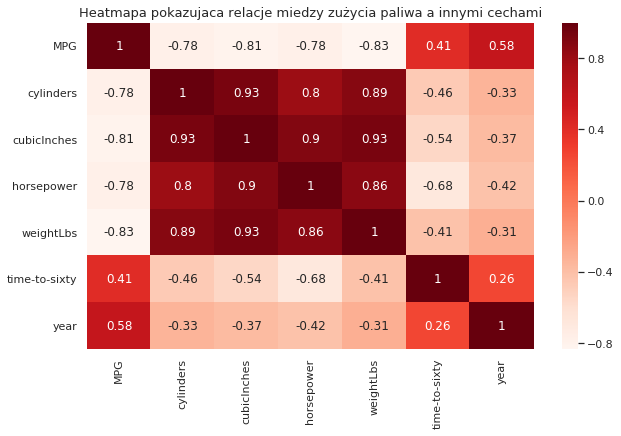

In [28]:

plt.figure(figsize=(10,6))
sns.heatmap(samo.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmapa pokazujaca relacje miedzy zużycia paliwa a innymi cechami',
         fontsize=13)
plt.show()

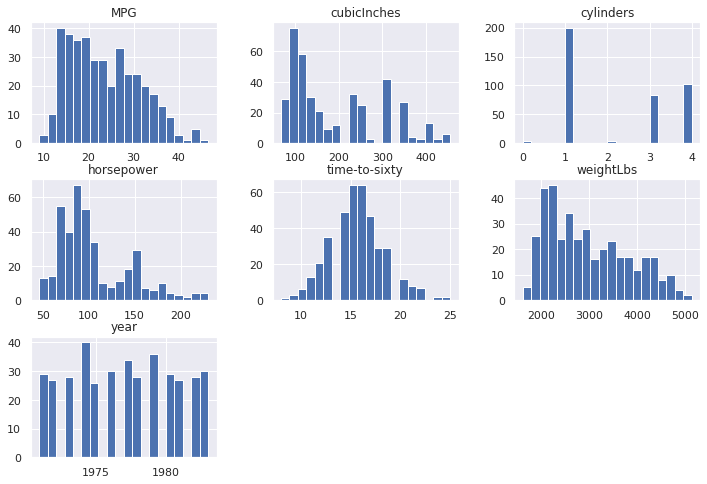

In [29]:
samo.hist(figsize=(12,8),bins=20)
plt.show()

In [30]:

print(samochody.feature_names)
#0 - MPG (ile mil można przejechać na jedym galonie paliwa)
#4 weightLbs (waga w Lbs)
X = samochody.data[:,[0,4]]

# Konwersja typów dla y

y = samochody['target']
y = [int(elem) for elem in y]

#Podział na zbiór uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#Tworzenie klasyfikatora z 3 klastrami
kmn = KMeans(n_clusters=3)
#nauka klasyfikatora danych treningowych
kmn.fit(X_train)

['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs', 'time-to-sixty', 'year']


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

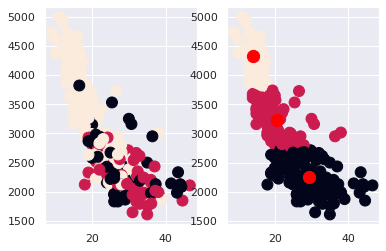

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=120)

y_pred_train = kmn.predict(X_train)

ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=120)

ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=150)
plt.show()

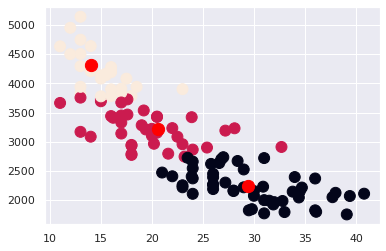

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

# Próbujemy przewidzieć gatunki dla zbioru testowego
y_pred = kmn.predict(X_test)

# Nowe gatunki przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=120)

# Tak jak powyżej, wyświetlamy centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='red', s=150)
plt.show()

In [33]:
from sklearn.datasets import fetch_openml

samochody = fetch_openml('cars1')

dataset = pd.DataFrame(samochody['data'], columns=samochody['feature_names'])


y = samochody['target']
y = [int(elem) for elem in y]
y[:5]
#print(Xa)
# Importing the dataset
#dataset =fetch_openml('cars1')
# pd.read_csv('../input/cars.csv')

X = dataset.iloc[:,:7].values

#X = cars.iloc[:,:7]
#X.describe()

X = pd.DataFrame(X)

#X = pd.to_numeric(X, downcast='signed')
X = X.apply(pd.to_numeric, axis=1)

#X = X.convert_objects(convert_numeric=True)
#X=pd.to_numeric(dataset)
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']

# Eliminating null values
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())


0
0
0
0
0
0
0


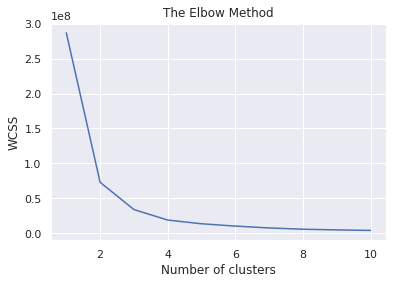

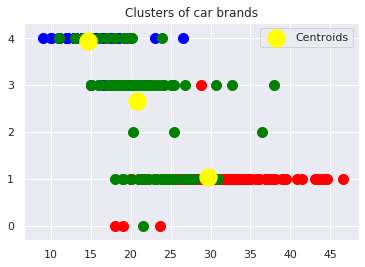

In [20]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red')#,label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue')#,label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green')#,label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()
